In [1]:

import IPython
import pandas as pd
import pandas_profiling as pp
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import itertools

from sklearn.datasets import load_iris
from sklearn.linear_model import Ridge 
from catboost import CatBoost

import graphviz

import lightgbm as lgb

df = pd.read_csv("Desktop/iris.csv", header='infer')
df = df[["sepal.length","sepal.width","petal.length","petal.width","variety"]]






In [2]:
#wyświetla pierwsze 5 linijek. 
# jako arguemnt przyjmuje ile lini ma wypisac
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [4]:
#df.describe()

#mean - średnia wartośc odchylenia na osi

#std - odchylenie standardowe czyli miernik ile zmian występuje w danych.  1 -> maly rozrzut
   #JAk szeroro wartości danych rozrzucone są wokół jej średniej

In [5]:
#df["sepal.length"].hist()
#histogram

In [6]:
#sns.clustermap(df.corr());

In [7]:
#Za x przyjmuje dane bez nazw kwiatów z bazy
X = df.drop("variety",axis=1)


#Za y przyjmuje nazwy kwiatów, które chce ai wyszukac
Y = df["variety"]


#Dane treningowe, i dane testowe
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=12)

In [8]:

#DANE,   X do treningu Y do trening Y do test
len(X), len(X_train), len(Y_train), len(Y_test)

(150, 112, 112, 38)

In [9]:
#sprawdzamy model stały, czyli taki w ktory nieingerujemy

Y_pred_const = np.full(Y_test.shape, Y_train.mean())

Y_pred_const[:3]



array([1.03571429, 1.03571429, 1.03571429])

In [10]:

#pierwaistek błędu kwadratowego (dowiedziec sie co to jest i po co)
np.sqrt(mean_squared_error(Y_test, Y_pred_const))

0.8324691186538707

In [11]:
#r kwadrat, powinnie byc bliskie zeru
r2_score(Y_test, Y_pred_const)

-0.02952569916855663

In [12]:
#prawdziwe wartosci i to co my przewidujemy

'''def plot_predictions(Y_true, Y_predicted):
    df_pred = pd.DataFrame({"true":Y_true,"predicted": Y_predicted})
    val_min = 0
    val_max = 10000000
    figure = sns.jointplot('true','predicted',df_pred,
                          xlim=(val_min, val_max),
                          ylim=(val_min, val_max))
    figure.ax_joint.plot([val_min, val_max], [val_min, val_max], ':k')
    figure.fig.set_figheight(8)
    figure.fig.set_figwidth(8)'''
    

'def plot_predictions(Y_true, Y_predicted):\n    df_pred = pd.DataFrame({"true":Y_true,"predicted": Y_predicted})\n    val_min = 0\n    val_max = 10000000\n    figure = sns.jointplot(\'true\',\'predicted\',df_pred,\n                          xlim=(val_min, val_max),\n                          ylim=(val_min, val_max))\n    figure.ax_joint.plot([val_min, val_max], [val_min, val_max], \':k\')\n    figure.fig.set_figheight(8)\n    figure.fig.set_figwidth(8)'

In [13]:
#plot_predictions(x, Y_pred_const)

In [14]:
#podejście nr 1- regresja liniowa

#EMPTY, TODO



In [15]:
#podejście nr 2-Light GBM. Pochodzi z Scikit-learn API

lgb_model = lgb.LGBMRegressor(random_state=12)




In [16]:
lgb_model.fit(X_train, Y_train)


LGBMRegressor(random_state=12)

In [17]:
Y_pred_lgb = lgb_model.predict(X_test)

In [18]:

np.sqrt(mean_squared_error(Y_test, Y_pred_lgb))

0.21974834982157557

In [19]:
r2_score(Y_test, Y_pred_lgb)

0.9282615195596736

<AxesSubplot:xlabel='variety'>

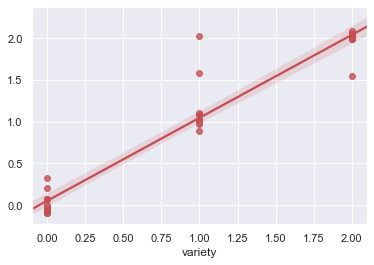

In [20]:
sns.regplot(x = Y_test,y =  Y_pred_lgb, color ="r",truncate=False)

In [21]:
rmse_test = mean_squared_error(Y_test, Y_pred_lgb) ** 0.5
print(f'The RMSE of prediction is: {rmse_test}')

The RMSE of prediction is: 0.21974834982157557


In [22]:
#Dokładnosci treningu i testowania

print('Training accuracy {:.4f}'.format(lgb_model.score(X_train,Y_train)))
print('Testing accuracy {:.4f}'.format(lgb_model.score(X_test,Y_test)))

Training accuracy 0.9742
Testing accuracy 0.9283


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

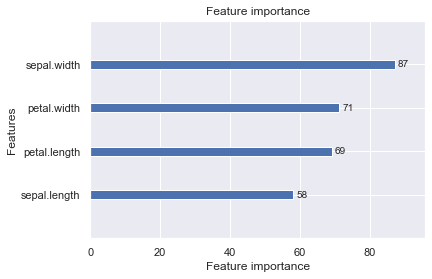

In [23]:
lgb.plot_importance(lgb_model)

<AxesSubplot:>

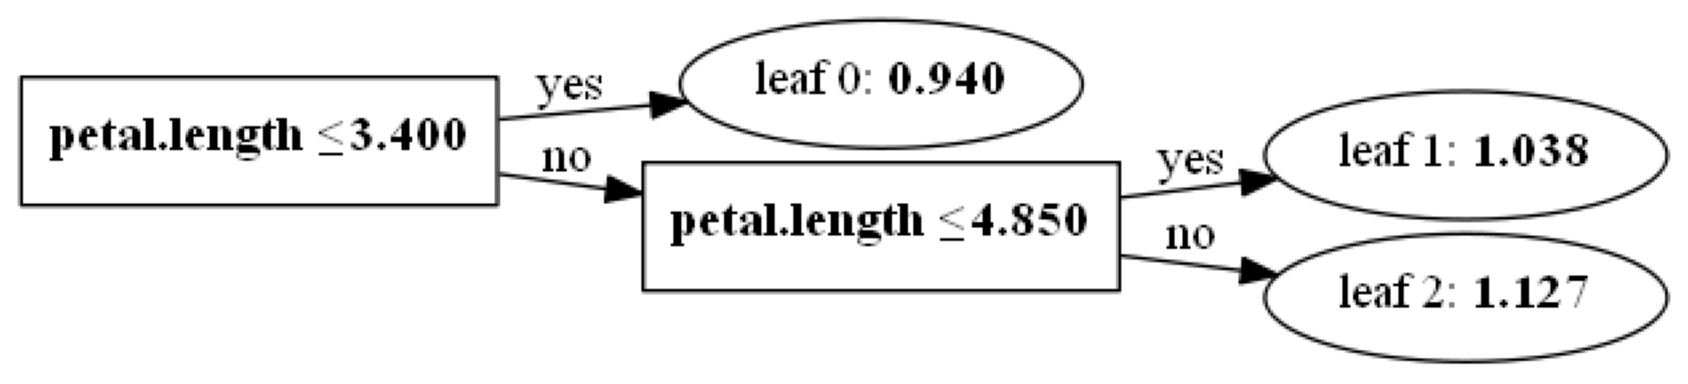

In [24]:
lgb.plot_tree(lgb_model, figsize=(30,40))